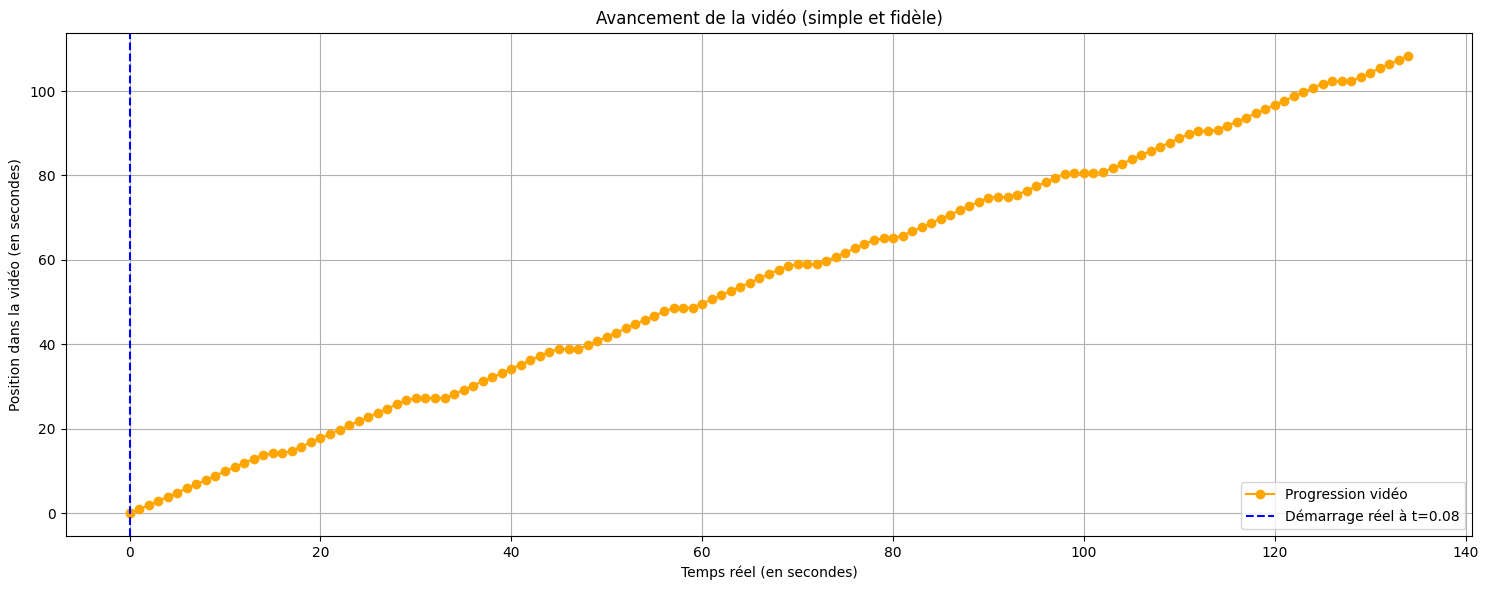

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("qoe_data_received.csv", sep=";")
df["videoTime"] = df["videoTime"].astype(str).str.replace(",", ".").astype(float)

start_value = df["videoTime"].iloc[0]
start_time = 1.0 - start_value

p0 = pd.DataFrame([{"realTime": 0.0, "videoTime": 0.0}])

p1 = pd.DataFrame([{"realTime": start_time, "videoTime": 0.0}])

df_real = df.copy()
df_real["realTime"] = np.arange(1.0, 1.0 + len(df_real), 1.0)

df_plot = pd.concat([p0, p1, df_real], ignore_index=True)

plt.figure(figsize=(15, 6))
plt.plot(df_plot["realTime"], df_plot["videoTime"], color='orange', marker='o', label="Progression vidéo")
plt.axvline(x=start_time, color='blue', linestyle='--', label=f"Démarrage réel à t={start_time:.2f}")
plt.title("Avancement de la vidéo (simple et fidèle)")
plt.xlabel("Temps réel (en secondes)")
plt.ylabel("Position dans la vidéo (en secondes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


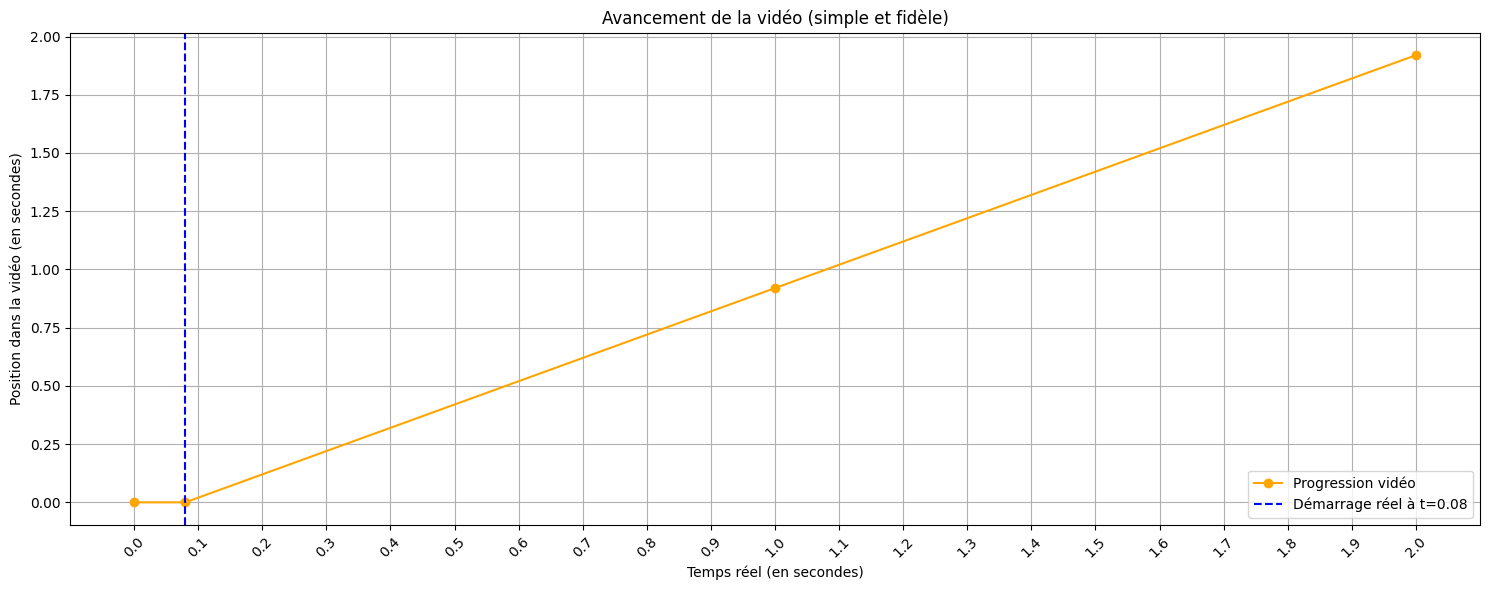

In [ ]:
df_start = df_plot[df_plot["realTime"] <= 2]
x_ticks = np.arange(0, 2.1, 0.1)

plt.figure(figsize=(15, 6))
plt.plot(df_start["realTime"], df_start["videoTime"], color='orange', marker='o', label="Progression vidéo")
plt.axvline(x=start_time, color='blue', linestyle='--', label=f"Démarrage réel à t={start_time:.2f}")
plt.title("Avancement de la vidéo (simple et fidèle)")
plt.xlabel("Temps réel (en secondes)")
plt.ylabel("Position dans la vidéo (en secondes)")
plt.xticks(x_ticks, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd

# Charger les données
df = pd.read_csv("qoe_data_received.csv", sep=";")
df["videoTime"] = df["videoTime"].astype(str).str.replace(",", ".").astype(float)
# Calculer la différence entre chaque frame
df["delta"] = df["videoTime"].diff().fillna(0)

# Définir comme freeze toute frame où videoTime ne change pas
freeze_frames = df[df["delta"] == 0].shape[0]
total_frames = df.shape[0]

# Calcul du pourcentage
freeze_percentage = (freeze_frames / total_frames) * 100

In [ ]:
import pandas as pd

# Charger les données
df = pd.read_csv("qoe_data_received.csv", sep=";")
df["videoTime"] = df["videoTime"].astype(str).str.replace(",", ".").astype(float)
# Calcul du delta entre chaque point
df["delta"] = df["videoTime"].diff().fillna(0)

# Déterminer la durée totale de la vidéo
total_duration = df["videoTime"].max()

# Zones
start_limit = total_duration * 0.10
end_limit = total_duration * 0.90

# Ajouter une colonne de zone : début / milieu / fin
def zone_classification(t):
    if t <= start_limit:
        return "début"
    elif t >= end_limit:
        return "fin"
    else:
        return "milieu"

df["zone"] = df["videoTime"].apply(zone_classification)

# Total et freeze par zone
total_counts = df.groupby("zone").size()
freeze_counts = df[df["delta"] == 0].groupby("zone").size()

# Fusion pour pourcentages
result = pd.DataFrame({
    "total_frames": total_counts,
    "freeze_frames": freeze_counts
}).fillna(0)

result["freeze_percent"] = (result["freeze_frames"] / result["total_frames"]) * 100


no data in the zone start.
no data in the zone middle.
no data in the zone end.


In [ ]:
print(f"❄ Pourcentage of freeze : {freeze_percentage:.2f}% ({freeze_frames} over {total_frames} mesures)")
for zone in ["start", "middle", "end"]:
    if zone in result.index:
        p = result.loc[zone, "freeze_percent"]
        print(f"❄ Freeze in the {zone} : {p:.2f}%")
    else:
        print(f"no data in the zone {zone}.")
print(f"❄ Time to start : {start_time*1000:.2f}ms")

❄ Pourcentage of freeze : 12.69% (17 over 134 mesures)
❄ Time to start : 80.00ms
